In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
dataset=pd.read_csv("D:\Self\Data Science\Linear Regression\Assignment\Salary_Data.csv")

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
dataset.shape

(30, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

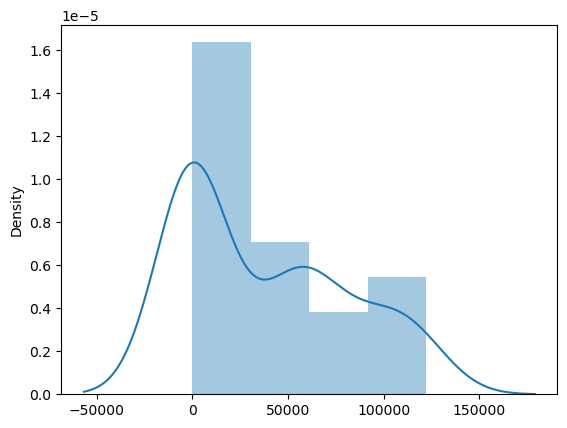

In [5]:
sns.distplot(dataset)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

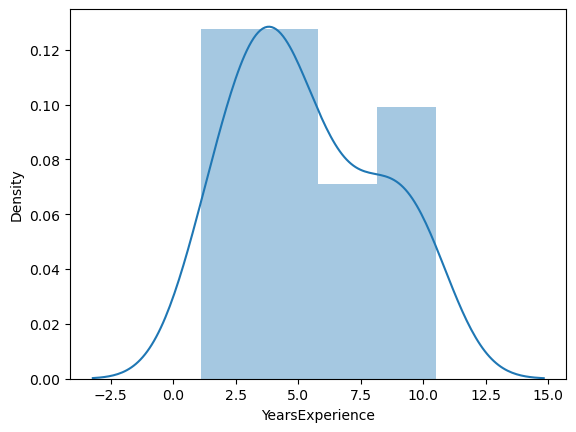

In [6]:
sns.distplot(dataset['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

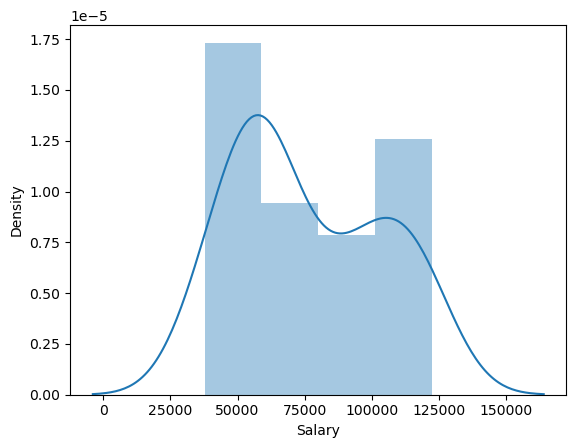

In [7]:
sns.distplot(dataset['Salary'])

In [8]:
dataset=dataset.rename({'YearsExperience':'years_experience','Salary':'salary'},axis=1)

In [9]:
dataset.head ()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   years_experience  30 non-null     float64
 1   salary            30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
dataset.columns

Index(['years_experience', 'salary'], dtype='object')

In [12]:
dataset.corr ()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='years_experience', ylabel='salary'>

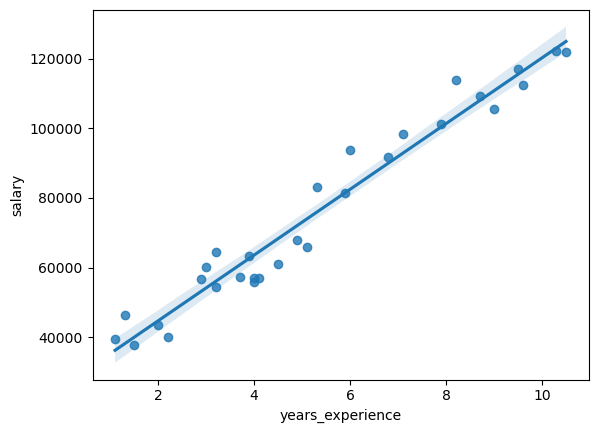

In [13]:
sns.regplot(x=dataset['years_experience'],y=dataset['salary'])

In [14]:
#model building
model=smf.ols("salary~years_experience",data=dataset).fit()

In [15]:
#model testing
# finding parameters
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [16]:
#finding pvalue & tvalue
model.tvalues , model.pvalues

(Intercept           11.346940
 years_experience    24.950094
 dtype: float64,
 Intercept           5.511950e-12
 years_experience    1.143068e-20
 dtype: float64)

In [17]:
#finding r squared
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [18]:
dataset


,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [19]:
#model prediction
model.predict (dataset)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [37]:
model2=smf.ols("salary~np.log(years_experience)",data=dataset).fit()

In [38]:
#model testing
# finding parameters
model2.params

Intercept                   14927.97177
np.log(years_experience)    40581.98796
dtype: float64

In [39]:
#finding pvalue & tvalue
model2.tvalues , model2.pvalues

(Intercept                    2.895135
 np.log(years_experience)    12.791989
 dtype: float64,
 Intercept                   7.268813e-03
 np.log(years_experience)    3.250155e-13
 dtype: float64)

In [40]:
#finding r squared
model2.rsquared , model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [41]:
model2.predict(dataset)

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64